# Milestone 2
## Abhisek Sarkar

Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tkinter import font

Load the dataset

In [2]:
file_path = 'D:\\Infosys Internship\\Healthcare Providers.csv'
df = pd.read_csv(file_path)
df.head()

,index,National Provider Identifier,Last Name/Organization Name of the Provider,First Name of the Provider,Middle Initial of the Provider,Credentials of the Provider,Gender of the Provider,Entity Type of the Provider,Street Address 1 of the Provider,Street Address 2 of the Provider,...,HCPCS Code,HCPCS Description,HCPCS Drug Indicator,Number of Services,Number of Medicare Beneficiaries,Number of Distinct Medicare Beneficiary/Per Day Services,Average Medicare Allowed Amount,Average Submitted Charge Amount,Average Medicare Payment Amount,Average Medicare Standardized Amount
0,8774979,1891106191,UPADHYAYULA,SATYASREE,NaN,M.D.,F,I,1402 S GRAND BLVD,FDT 14TH FLOOR,...,99223,"Initial hospital inpatient care, typically 70 ...",N,27,24,27,200.58777778,305.21111111,157.26222222,160.90888889
1,3354385,1346202256,JONES,WENDY,P,M.D.,F,I,2950 VILLAGE DR,NaN,...,G0202,"Screening mammography, bilateral (2-view study...",N,175,175,175,123.73,548.8,118.83,135.31525714
2,3001884,1306820956,DUROCHER,RICHARD,W,DPM,M,I,20 WASHINGTON AVE,STE 212,...,99348,"Established patient home visit, typically 25 m...",N,32,13,32,90.65,155,64.4396875,60.5959375
3,7594822,1770523540,FULLARD,JASPER,NaN,MD,M,I,5746 N BROADWAY ST,NaN,...,81002,"Urinalysis, manual test",N,20,18,20,3.5,5,3.43,3.43
4,746159,1073627758,PERROTTI,ANTHONY,E,DO,M,I,875 MILITARY TRL,SUITE 200,...,96372,Injection beneath the skin or into muscle for ...,N,33,24,31,26.52,40,19.539393939,19.057575758


Preprocess

In [3]:
# Merging the First Name, Middle initial and last name into full name

def create_full_name(row):
  # Extract names
  first_name = row['First Name of the Provider']
  middle_initial = row['Middle Initial of the Provider']
  last_name = row['Last Name/Organization Name of the Provider']
  
  # Construct full name with space in place of missing middle initial
  full_name = f"{first_name} {' ' if pd.isna(middle_initial) else middle_initial} {last_name}"
  return full_name

# Apply function to create 'Full Name' column with space for missing middle initial
df['Full Name'] = df.apply(create_full_name, axis=1)

# Drop the original columns
df.drop(columns=['First Name of the Provider', 'Middle Initial of the Provider', 'Last Name/Organization Name of the Provider'], inplace=True)

# Show the 'Full Name' column
print(df[['Full Name']])

                      Full Name
0       SATYASREE   UPADHYAYULA
1                 WENDY P JONES
2            RICHARD W DUROCHER
3              JASPER   FULLARD
4            ANTHONY E PERROTTI
...                         ...
99995              JOAN   PAPES
99996         MARGARET S HAYNER
99997           DANA   VALENCIA
99998  RAFAELA   GONZALEZ-LAMOS
99999         ELIIAN   RAMEZANI

[100000 rows x 1 columns]


Missing Values and duplicate values Management

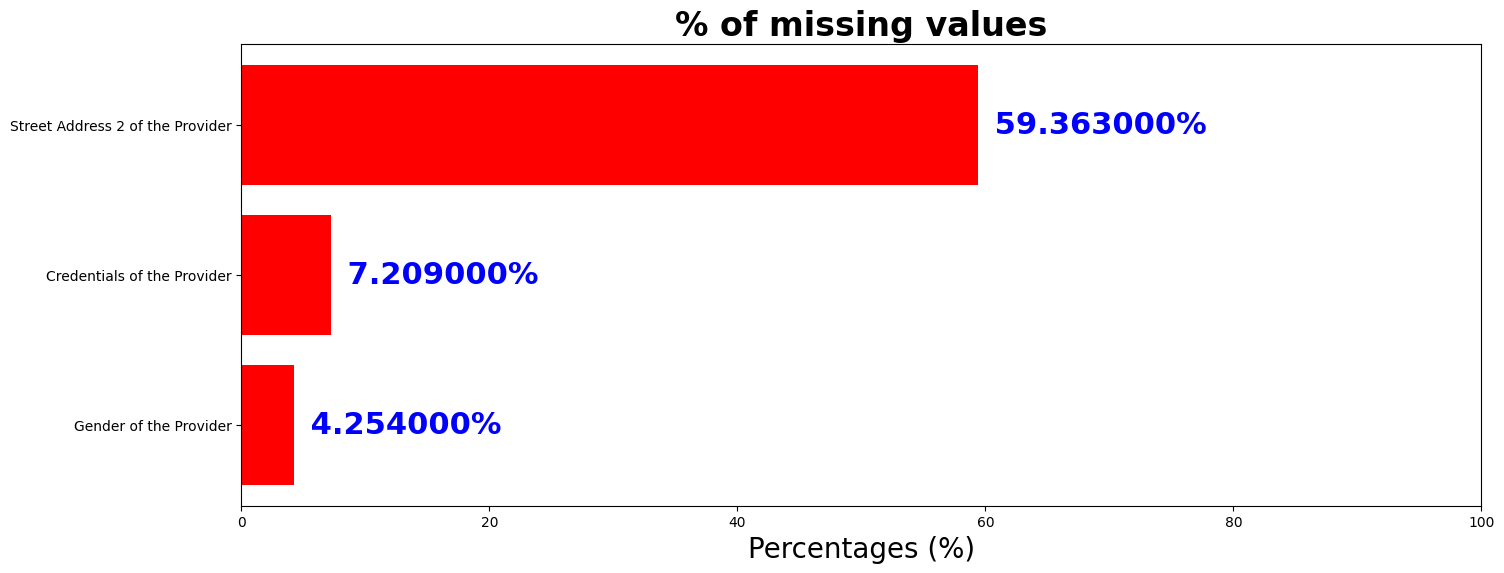

In [4]:
# Calculate the percentage of missing values for each column
missing_data = df.isnull().sum()
missing_percentage = (missing_data[missing_data > 0]/ df.shape[0])*100
missing_percentage.sort_values(ascending = True, inplace= True)

# Plot the Barch Chart
fig, ax = plt.subplots(figsize = (16,6))
ax.barh(missing_percentage.index, missing_percentage, color='red')

for i, (value, name) in enumerate(zip(missing_percentage, missing_percentage.index)):
    ax.text(value + 0.5, i, f"{value: 2f}%", ha = 'left', va = 'center', fontweight = 'bold', fontsize=22, color = 'blue')

ax.set_xlim([0,100])

plt.title("% of missing values", fontweight = 'bold', fontsize=24, color = 'black' )
plt.xlabel('Percentages (%)', fontsize = 20)
plt.show()

In [5]:
# Numeric Columns
numeric_columns = [
 'Number of Services',
 'Number of Medicare Beneficiaries',
 'Number of Distinct Medicare Beneficiary/Per Day Services',
 'Average Medicare Allowed Amount',
 'Average Submitted Charge Amount',
 'Average Medicare Payment Amount',
 'Average Medicare Standardized Amount'
]
for column in numeric_columns:
 df[column] = pd.to_numeric(df[column], errors='coerce')


df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 25 columns):
 #   Column                                                    Non-Null Count   Dtype  
---  ------                                                    --------------   -----  
 0   index                                                     100000 non-null  int64  
 1   National Provider Identifier                              100000 non-null  int64  
 2   Credentials of the Provider                               92791 non-null   object 
 3   Gender of the Provider                                    95746 non-null   object 
 4   Entity Type of the Provider                               100000 non-null  object 
 5   Street Address 1 of the Provider                          100000 non-null  object 
 6   Street Address 2 of the Provider                          40637 non-null   object 
 7   City of the Provider                                      100000 non-null  object 
 8   Zip C

In [6]:
# Imputation of missing values with mean
df[numeric_columns] = df[numeric_columns].fillna(df[numeric_columns].mean())
print(df.isnull().sum())

index                                                           0
National Provider Identifier                                    0
Credentials of the Provider                                  7209
Gender of the Provider                                       4254
Entity Type of the Provider                                     0
Street Address 1 of the Provider                                0
Street Address 2 of the Provider                            59363
City of the Provider                                            0
Zip Code of the Provider                                        0
State Code of the Provider                                      0
Country Code of the Provider                                    0
Provider Type                                                   0
Medicare Participation Indicator                                0
Place of Service                                                0
HCPCS Code                                                      0
HCPCS Desc

In [7]:
# Check for duplicates
print(df.duplicated().sum())

0


In [8]:
# Define a list of categorical columns
categorical_columns = ['Credentials of the Provider',
                   'Gender of the Provider',
                   'City of the Provider',
                  'State Code of the Provider']
# Iterate through the categorical columns
for column in categorical_columns:
    # Fill missing values with the mode of the column (most frequent value)
    df[column].fillna(df[column].mode()[0], inplace=True)
# Print the number of null values in each column
print(df.isnull().sum())

index                                                           0
National Provider Identifier                                    0
Credentials of the Provider                                     0
Gender of the Provider                                          0
Entity Type of the Provider                                     0
Street Address 1 of the Provider                                0
Street Address 2 of the Provider                            59363
City of the Provider                                            0
Zip Code of the Provider                                        0
State Code of the Provider                                      0
Country Code of the Provider                                    0
Provider Type                                                   0
Medicare Participation Indicator                                0
Place of Service                                                0
HCPCS Code                                                      0
HCPCS Desc

In [9]:
irrelevant_columns=['Entity Type of the Provider',
                    'Street Address 1 of the Provider',
                    'Street Address 2 of the Provider',
                    'Zip Code of the Provider',
                    'Medicare Participation Indicator',
                    'Place of Service',
                    'HCPCS Code',
                    'HCPCS Description',
                    'HCPCS Drug Indicator',
                    'Country Code of the Provider']

df=df.drop(columns=irrelevant_columns)
df.head()

,index,National Provider Identifier,Credentials of the Provider,Gender of the Provider,City of the Provider,State Code of the Provider,Provider Type,Number of Services,Number of Medicare Beneficiaries,Number of Distinct Medicare Beneficiary/Per Day Services,Average Medicare Allowed Amount,Average Submitted Charge Amount,Average Medicare Payment Amount,Average Medicare Standardized Amount,Full Name
0,8774979,1891106191,M.D.,F,SAINT LOUIS,MO,Internal Medicine,27.0,24.0,27.0,200.587778,305.211111,157.262222,160.908889,SATYASREE UPADHYAYULA
1,3354385,1346202256,M.D.,F,FAYETTEVILLE,NC,Obstetrics & Gynecology,175.0,175.0,175.0,123.730000,548.800000,118.830000,135.315257,WENDY P JONES
2,3001884,1306820956,DPM,M,NORTH HAVEN,CT,Podiatry,32.0,13.0,32.0,90.650000,155.000000,64.439688,60.595937,RICHARD W DUROCHER
3,7594822,1770523540,MD,M,KANSAS CITY,MO,Internal Medicine,20.0,18.0,20.0,3.500000,5.000000,3.430000,3.430000,JASPER FULLARD
4,746159,1073627758,DO,M,JUPITER,FL,Internal Medicine,33.0,24.0,31.0,26.520000,40.000000,19.539394,19.057576,ANTHONY E PERROTTI


In [10]:
def frequency_encode(ddf, columns):
    for column in columns:
        freq_encoding = ddf[column].value_counts() / len(ddf)
        new_column_name = column + '_Freq'
        ddf.insert(ddf.columns.get_loc(column) + 1, new_column_name, ddf[column].map(freq_encoding))
    return ddf

columns_to_encode=['Credentials of the Provider',
                   'Gender of the Provider',
                   'Provider Type',
                  'State Code of the Provider']

df = frequency_encode(df, columns_to_encode)

df.head()

,index,National Provider Identifier,Credentials of the Provider,Credentials of the Provider_Freq,Gender of the Provider,Gender of the Provider_Freq,City of the Provider,State Code of the Provider,State Code of the Provider_Freq,Provider Type,Provider Type_Freq,Number of Services,Number of Medicare Beneficiaries,Number of Distinct Medicare Beneficiary/Per Day Services,Average Medicare Allowed Amount,Average Submitted Charge Amount,Average Medicare Payment Amount,Average Medicare Standardized Amount,Full Name
0,8774979,1891106191,M.D.,0.32757,F,0.29105,SAINT LOUIS,MO,0.01997,Internal Medicine,0.11366,27.0,24.0,27.0,200.587778,305.211111,157.262222,160.908889,SATYASREE UPADHYAYULA
1,3354385,1346202256,M.D.,0.32757,F,0.29105,FAYETTEVILLE,NC,0.03725,Obstetrics & Gynecology,0.01028,175.0,175.0,175.0,123.730000,548.800000,118.830000,135.315257,WENDY P JONES
2,3001884,1306820956,DPM,0.01330,M,0.70895,NORTH HAVEN,CT,0.01403,Podiatry,0.02027,32.0,13.0,32.0,90.650000,155.000000,64.439688,60.595937,RICHARD W DUROCHER
3,7594822,1770523540,MD,0.40083,M,0.70895,KANSAS CITY,MO,0.01997,Internal Medicine,0.11366,20.0,18.0,20.0,3.500000,5.000000,3.430000,3.430000,JASPER FULLARD
4,746159,1073627758,DO,0.02478,M,0.70895,JUPITER,FL,0.07263,Internal Medicine,0.11366,33.0,24.0,31.0,26.520000,40.000000,19.539394,19.057576,ANTHONY E PERROTTI


In [11]:
from sklearn.preprocessing import StandardScaler

standardization_columns=['Number of Services',
                         'Number of Medicare Beneficiaries',
                         'Number of Distinct Medicare Beneficiary/Per Day Services',
                         'Average Medicare Allowed Amount',
                         'Average Submitted Charge Amount',
                         'Average Medicare Payment Amount',
                         'Average Medicare Standardized Amount',
                         'Credentials of the Provider_Freq',
                         'Gender of the Provider_Freq',
                         'State Code of the Provider_Freq' ]

# Standardization
standard_scaler = StandardScaler()
df[standardization_columns] = standard_scaler.fit_transform(df[standardization_columns])


data_copy=df.copy()

print("Standardized DataFrame:")
df.head()

Standardized DataFrame:


,index,National Provider Identifier,Credentials of the Provider,Credentials of the Provider_Freq,Gender of the Provider,Gender of the Provider_Freq,City of the Provider,State Code of the Provider,State Code of the Provider_Freq,Provider Type,Provider Type_Freq,Number of Services,Number of Medicare Beneficiaries,Number of Distinct Medicare Beneficiary/Per Day Services,Average Medicare Allowed Amount,Average Submitted Charge Amount,Average Medicare Payment Amount,Average Medicare Standardized Amount,Full Name
0,8774979,1891106191,M.D.,0.349313,F,-1.560716,SAINT LOUIS,MO,-0.737342,Internal Medicine,0.11366,-0.497577,-0.444753,-0.482232,1.098226,0.621012,0.972452,1.003321,SATYASREE UPADHYAYULA
1,3354385,1346202256,M.D.,0.349313,F,-1.560716,FAYETTEVILLE,NC,-0.004973,Obstetrics & Gynecology,0.01028,0.503328,1.040098,0.554599,0.352134,1.940981,0.549955,0.722789,WENDY P JONES
2,3001884,1306820956,DPM,-1.595350,M,0.640731,NORTH HAVEN,CT,-0.989093,Podiatry,0.02027,-0.463762,-0.552921,-0.447204,0.031012,-0.192958,-0.047975,-0.096209,RICHARD W DUROCHER
3,7594822,1770523540,MD,0.802637,M,0.640731,KANSAS CITY,MO,-0.737342,Internal Medicine,0.11366,-0.544917,-0.503753,-0.531272,-0.814992,-1.005784,-0.718674,-0.722804,JASPER FULLARD
4,746159,1073627758,DO,-1.524313,M,0.640731,JUPITER,FL,1.494517,Internal Medicine,0.11366,-0.456999,-0.444753,-0.454210,-0.591527,-0.816125,-0.541578,-0.551510,ANTHONY E PERROTTI


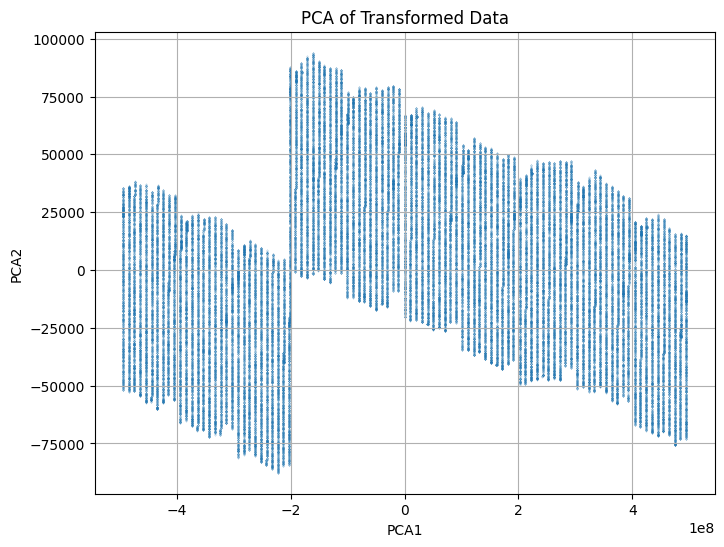

In [12]:
from sklearn.decomposition import PCA

ddf=df.copy()

# Imputation of categorical columns with mode
categorical_columns = ['Full Name',
                       'Credentials of the Provider',
                       'Gender of the Provider',
                       'City of the Provider',
                       'Provider Type',
                       'State Code of the Provider']

for column in ddf.columns:
    ddf[column].fillna(ddf[column].mode()[0], inplace=True)

ddf = ddf.drop(columns=categorical_columns)

pca = PCA(n_components=2)
pca_result = pca.fit_transform(ddf)

# DataFrame of PCA results
pca_df = pd.DataFrame(pca_result, columns=['PCA1', 'PCA2'])

# Scatter plot of PCA1 and PCA2
plt.figure(figsize=(8, 6))
plt.scatter(pca_df['PCA1'], pca_df['PCA2'], s = 0.01)
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.title('PCA of Transformed Data')
plt.grid(True)
plt.show()

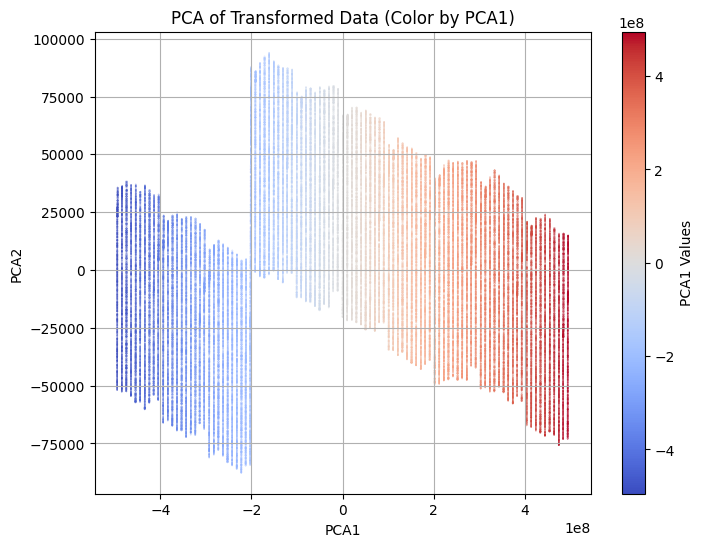

In [13]:
# Scatter plot with different colors for PCA1 and PCA2
plt.figure(figsize=(8, 6))

# Separate data for each component (optional for clarity)
pca1 = pca_df['PCA1']
pca2 = pca_df['PCA2']

# Scatter plot with color mapping
plt.scatter(pca1, pca2, c=pca1, cmap='coolwarm', s = 0.01)  # Adjust colormap as needed

# Adjust legend and labels (optional)
plt.colorbar(label='PCA1 Values')  # Add colorbar legend for PCA1
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.title('PCA of Transformed Data (Color by PCA1)')
plt.grid(True)
plt.show()


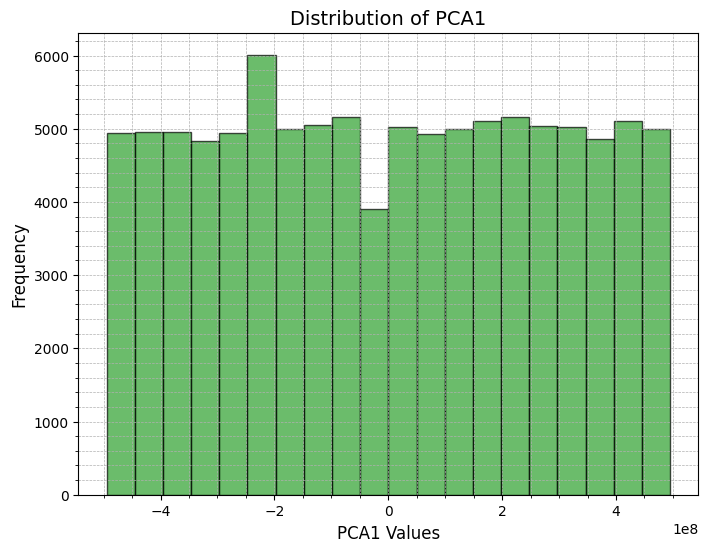

In [14]:
# Improved PCA1 histogram plot
plt.figure(figsize=(8, 6))  # Adjust figure size for better readability

# Plot the histogram with customizations
plt.hist(pca_df['PCA1'], bins=20, edgecolor='black', color='#2ca02c', alpha=0.7)
# Customize labels and title
plt.xlabel('PCA1 Values', fontsize=12)  # Adjust font size
plt.ylabel('Frequency', fontsize=12)
plt.title('Distribution of PCA1', fontsize=14)

# Enhance grid lines and add minor ticks for better precision
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.minorticks_on()

# Display the plot
plt.show()


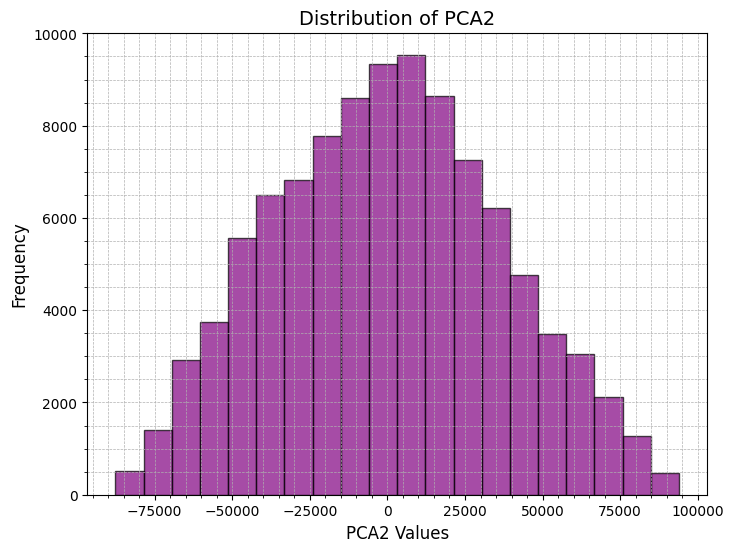

In [15]:
plt.figure(figsize=(8, 6))  # Adjust figure size for readability

# Plot the histogram with customizations
plt.hist(pca_df['PCA2'], bins=20, edgecolor='black', color='purple', alpha=0.7)

# Customize labels and title
plt.xlabel('PCA2 Values', fontsize=12)  # Adjust font size
plt.ylabel('Frequency', fontsize=12)
plt.title('Distribution of PCA2', fontsize=14)

# Enhance grid lines and add minor ticks for better precision
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.minorticks_on()

# Display the plot
plt.show()



### Clustering

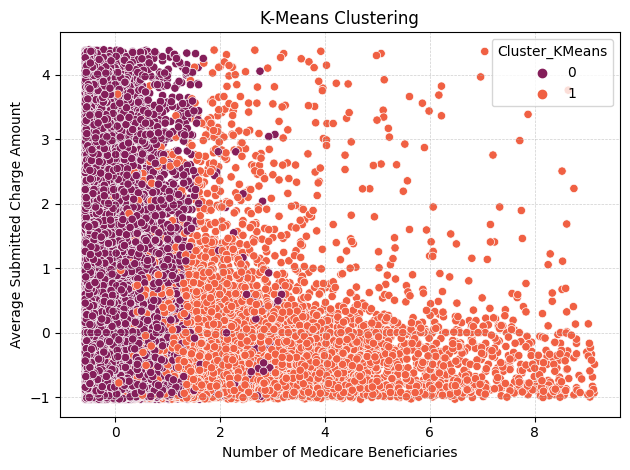

In [16]:
# Import necessary libraries
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score

# Clustering using K-Means
kmeans = KMeans(n_clusters=2, random_state=42)
df['Cluster_KMeans'] = kmeans.fit_predict(df[numeric_columns])

sns.scatterplot(data=df, x='Number of Medicare Beneficiaries', y='Average Submitted Charge Amount', 
                hue='Cluster_KMeans', palette='rocket', legend='full')
plt.title('K-Means Clustering')
#plt.xticks(rotation=45)
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.6)  # Add subtle grid lines
plt.tight_layout()
plt.show()

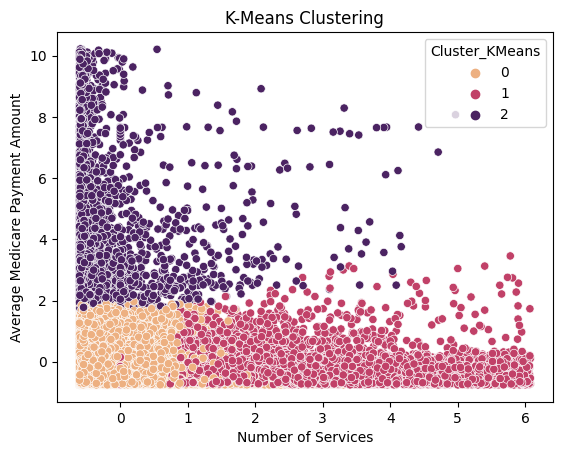

In [17]:
# Clustering using K-Means
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster_KMeans'] = kmeans.fit_predict(df[numeric_columns])
sns.scatterplot(data=df, x='Number of Services', y='Average Medicare Payment Amount', hue='Cluster_KMeans', 
                palette='flare', legend='full')
plt.title('K-Means Clustering')
plt.show()

#### DB Scan

Number of noise points: 788


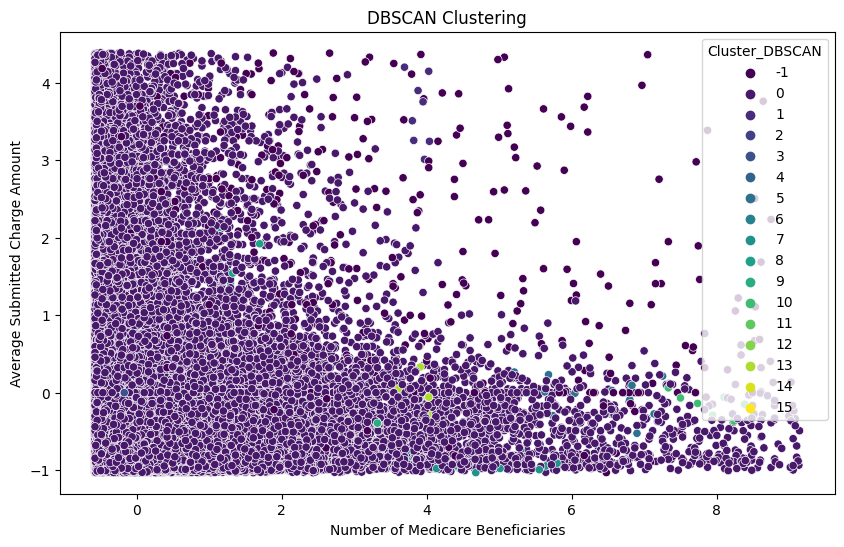

In [18]:
from sklearn.cluster import DBSCAN
# Clustering using DBSCAN
dbscan = DBSCAN(eps=0.7, min_samples=6)
df['Cluster_DBSCAN'] = dbscan.fit_predict(df[numeric_columns])

# Number of noise points
num_noise_points = (df['Cluster_DBSCAN'] == -1).sum()
print(f"Number of noise points: {num_noise_points}")

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Number of Medicare Beneficiaries', y='Average Submitted Charge Amount', 
                hue='Cluster_DBSCAN', palette='viridis', legend='full')
plt.title('DBSCAN Clustering')
plt.show()